# **Praktikum IV Machine Learning**

'''
=================================================
Nama  : Risfa Fadila

NPM : F1F022015

=================================================
'''

# **Latar Belakang**

Perkembangan pesat dalam teknologi informasi dan ilmu data telah menempatkan *Machine Learning* sebagai inti dari proses pengambilan keputusan yang berbasis data di berbagai sektor (Santoso, 2021). *Machine Learning* memungkinkan pengembangan model prediktif yang dapat secara otomatis melakukan tugas regresi, seperti memprediksi nilai berdasarkan analisis pola dari data historis. Meskipun model *Machine Learning* tunggal, seperti *Decision Tree* atau *Support Vector Regressor*, efektif dalam memecahkan banyak masalah, model-model ini sering menghadapi tantangan terkait stabilitas dan akurasi ketika berhadapan dengan data yang kompleks. Keterbatasan ini mendorong inovasi dalam pengembangan teknik yang dapat meningkatkan stabilitas dan akurasi prediksi, seperti implementasi metode ensemble. Metode ensemble seperti Bagging, Boosting, Voting, dan Stacking, bekerja dengan menggabungkan beberapa model dasar untuk menghasilkan prediksi yang lebih robust dan akurat (Sagi & Rokach, 2018). Teknik ensemble terbukti efektif dalam meningkatkan performa regresi, khususnya pada masalah prediksi yang krusial (Hastie et al., 2009).

Pertemuan ini berfokus pada eksplorasi dan evaluasi komparatif metode ensemble untuk mengatasi masalah regresi. Tujuan utama dari praktikum ini adalah untuk membangun, melatih, dan mengevaluasi model ensemble *Machine Learning* yaitu Bagging, Voting, Boosting, dan Stacking, dengan menggunakan metrik kinerja yang relevan.


# **Rumusan Masalah**

Berikut merupakan rumusan masalah pada bertemuan 4:
1.   Bagaimana konsep dasar Random Forest?
2.   Bagaimana mengimplementasikan Random Forest untuk klasifikasi dan regresi menggunakan scikit-learn?
3. Bagaimana melakukan evaluasi model menggunakan metrik performa?
4. Bagaimana menginterpretasikan hasil pemodelan?

# **Tujuan Penelitian**

Berdasarkan rumusan masalah, berikut merupakan tujuan pada pertemuan 4:
1.   Menjelaskan konsep dasar Random Forest.
2.   Mengimplementasikan Random Forest untuk klasifikasi dan regresi menggunakan scikit-learn.
3. Melakukan evaluasi model menggunakan metrik performa.
4. Menginterpretasikan hasil pemodelan.

# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [ ]:
!pip install feature_engine

In [ ]:
# Import Dasar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score # Metrik Regresi
from sklearn.model_selection import RandomizedSearchCV

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Ensemble Methods
from sklearn.ensemble import (
    VotingRegressor,         # Mirip VotingClassifier, untuk Regresi
    BaggingRegressor,        # Mirip BaggingClassifier, untuk Regresi
    RandomForestRegressor,   # Random Forest untuk Regresi
    AdaBoostRegressor,       # AdaBoost untuk Regresi
    GradientBoostingRegressor, # Metode Boosting populer (seperti XGBoost/LightGBM)
    StackingRegressor        # Mirip StackingClassifier, untuk Regresi
)

import warnings
warnings.filterwarnings('ignore')

# Memuat Data

In [ ]:
# Data Loading
df = pd.read_csv('https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/Dataset%20salary%202024.csv',
                 sep=';')

# Ambil 1000 data acak dengan seed 42
df = df.sample(n=1000, random_state=42).reset_index(drop=True)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Analyst,152380,USD,US,0,US,M
1,2023,MI,FT,Data Engineer,150000,USD,US,100,US,M
2,2024,SE,FT,Data Specialist,41418,GBP,GB,0,GB,M
3,2023,SE,FT,Data Analyst,138900,USD,US,0,US,M
4,2024,SE,FT,Data Scientist,237600,USD,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...
995,2022,MI,FT,AI Scientist,200000,USD,IN,100,US,L
996,2024,SE,FT,Data Architect,120000,USD,US,0,US,M
997,2022,SE,FT,Data Analyst,169000,USD,US,0,US,M
998,2020,EN,FT,Data Scientist,55000,EUR,DE,50,DE,S


# Analisis Data Eksploratif

In [ ]:
print(df.describe())                 # untuk numerik
print(df.describe(include='object')) # untuk kategorik

        work_year        salary  remote_ratio
count  1000.00000  1.000000e+03   1000.000000
mean   2023.24000  1.581860e+05     32.450000
std       0.71478  2.206034e+05     46.439791
min    2020.00000  2.000000e+04      0.000000
25%    2023.00000  1.008500e+05      0.000000
50%    2023.00000  1.400000e+05      0.000000
75%    2024.00000  1.850000e+05    100.000000
max    2024.00000  5.500000e+06    100.000000
       experience_level employment_type      job_title salary_currency  \
count              1000            1000           1000            1000   
unique                4               3             72              10   
top                  SE              FT  Data Engineer             USD   
freq                686             996            221             922   

       employee_residence company_location company_size  
count                1000             1000         1000  
unique                 33               32            3  
top                    US               U

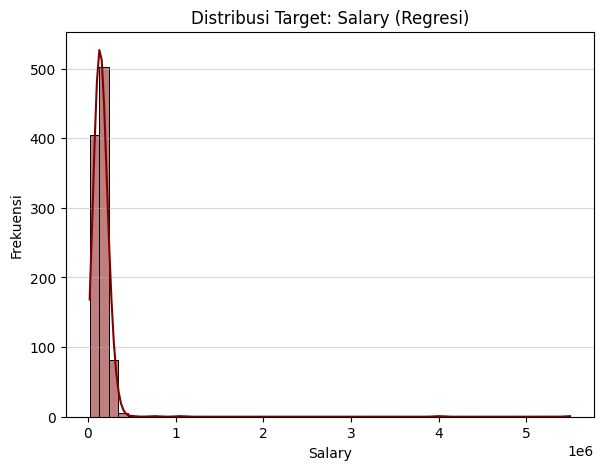

In [ ]:
# ============================================================
# Cek distribusi variabel target (Salary)
# ============================================================
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
#HISTOGRAM
sns.histplot(df['salary'], kde=True, bins=50, color='maroon')
plt.title('Distribusi Target: Salary (Regresi)')
plt.xlabel('Salary')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.5)


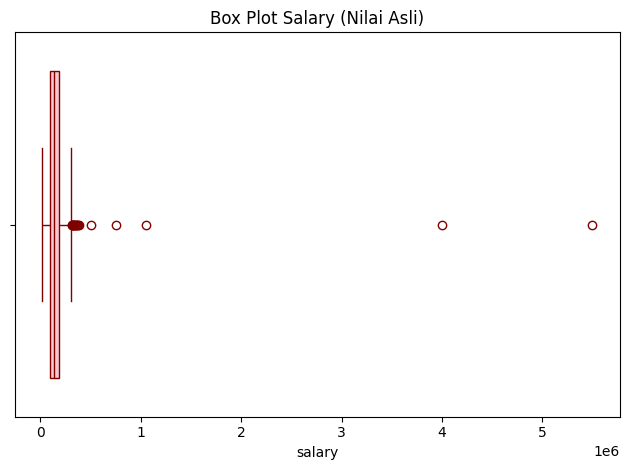

In [ ]:
#BOXPLOT
sns.boxplot(x='salary', data=df, color='pink', linecolor='maroon')
plt.title('Box Plot Salary (Nilai Asli)')
plt.xlabel('salary')
plt.tight_layout()
plt.show()

Pada pertemuan kali ini digunakan 1000 sample data dari dataset 'Salary'. Berdasarkan hasil visualisasi Histogram dan Box Plot terhadap variabel target 'Salary', dapat dilihat bahwa data memiliki distribusi yang  miring ke kanan (heavily right-skewed). Pada Histogram, data cenderung berada pada rentang nilai rendah atau mendekati 0. Sedangkan, pada Box Plot dapat dilihat bahwa terdapat beberapa titik data yang jauh dari whisker kanan yang mengindikasikan kehadiran outlier ekstrem yang menyebabkan rentang nilai luas.

# _Feature Engineering_

## A - Missing Value


In [ ]:
# Cek Missing Values
print("\nJumlah Missing Value per Kolom:")
print(df.isnull().sum())


Jumlah Missing Value per Kolom:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


Setelah melewati proses sampling (n=1000), dataset *Salary* terbukti tidak mengandung missing value. Berdasarkan hasil pemeriksaan, semua variabel termasuk variabel target menunjukkan nilai nol (0) untuk data kosong, sehingga tidak diperlukan proses imputasi data lebih lanjut.

## B - Kardinalitas

In [ ]:
# Tentukan variabel target
target_col = "salary"

# Ambil fitur kategorikal
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
categorical_predictors = categorical_cols

print("Kardinalitas Fitur Kategorikal (Prediktor):")
print("-" * 45)
for col in categorical_predictors:
    print(f"{col} -> {df[col].nunique()} kategori")

Kardinalitas Fitur Kategorikal (Prediktor):
---------------------------------------------
experience_level -> 4 kategori
employment_type -> 3 kategori
job_title -> 72 kategori
salary_currency -> 10 kategori
employee_residence -> 33 kategori
company_location -> 32 kategori
company_size -> 3 kategori


Kardinalitas merupakan jumlah nilai unik yang berbeda dalam suatu kolom fitur kategorikal. Output tersebut menunjukkan jumlah masing-masing nilai unik atau kategori dari setiap data fitur.

## C- Splitting Data

In [ ]:
target = 'salary'
X = df.drop(target, axis=1)
Y = df[target]

# Split dataset (tanpa stratify karena regresi)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42)

print("\nData Train:", X_train.shape)
print("Data Test:", X_test.shape)


Data Train: (750, 9)
Data Test: (250, 9)


Pada tahapan ini dataset dibagi menjadi dua bagian dengan proporsi 75% untuk data train dan 25% untuk data test, yang merupakan pembagian umum dalam pemodelan machine learning. Hasil pembagian menunjukkan bahwa data train berjumlah 750 baris dengan 4 fitur ((750, 4)), sedangkan data test berjumlah 250 baris dengan 4 fitur ((250, 4)). Data train digunakan untuk melatih model sehingga model dapat mempelajari pola dari dataset, sementara data test digunakan untuk mengevaluasi performa model terhadap data baru yang belum pernah dilihat sebelumnya. Pembagian ini dilakukan agar hasil evaluasi lebih objektif serta memastikan model memiliki kemampuan generalisasi yang baik dan tidak mengalami overfitting.

## D- Handling Outlier

In [ ]:
# ===========================
# HANDLING OUTLIER (IQR)
# ===========================

# Ambil hanya kolom numerik untuk perhitungan IQR
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Hitung Q1, Q3, dan IQR untuk kolom numerik
Q1 = X_train[numeric_cols].quantile(0.25)
Q3 = X_train[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filtering: baris yang tidak outlier
filtered_index = ~(
    (X_train[numeric_cols] < (Q1 - 1.5 * IQR)) |
    (X_train[numeric_cols] > (Q3 + 1.5 * IQR))
).any(axis=1)

# Terapkan filter hanya pada X_train
X_train_filtered = X_train[filtered_index]
# Samakan Y_train
Y_train_filtered = Y_train.loc[X_train_filtered.index]

# Reset index
X_train = X_train_filtered.reset_index(drop=True)
Y_train = Y_train_filtered.reset_index(drop=True)

print("\nJumlah data train setelah filtering outlier:", X_train.shape[0])


Jumlah data train setelah filtering outlier: 739


Pada tahap preprocessing, dilakukan penanganan outlier menggunakan metode Interquartile Range (IQR) untuk meningkatkan kualitas data sebelum proses pelatihan model. Berdasarkan hasil keluaran diperoleh jumlah data latih (train data) setelah proses *filtering outlier* adalah 739 observasi. Hal ini menunjukkan bahwa terdapat 11 observasi yang terdeteksi sebagai outlier berdasarkan kriteria IQR dan telah dihapus dari himpunan data train. Sehingga, proses pemodelan  dilanjutkan dengan menggunakan 739 observasiyang tersisa pada himpunan data train.

## E- Encoding dan Scaling

Berikut merupakan proses encoding dan scaling data fitur:

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

## ENCODING
# Cek kolom kategorik & numerik
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

print("Categorical columns:", list(categorical_cols))
print("Numerical columns:", list(numeric_cols))

# Encoder hanya untuk data kategorik
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Fit di Train-set
encoder.fit(X_train[categorical_cols])

# Transform Train & Test
X_train_cat_encoded = encoder.transform(X_train[categorical_cols])
X_test_cat_encoded = encoder.transform(X_test[categorical_cols])

# Konversi hasil encoding ke DataFrame
encoded_cols = encoder.get_feature_names_out(categorical_cols)
X_train_cat = pd.DataFrame(X_train_cat_encoded, columns=encoded_cols, index=X_train.index)
X_test_cat = pd.DataFrame(X_test_cat_encoded, columns=encoded_cols, index=X_test.index)

# Gabungkan kembali dengan kolom numerik
X_train_final = pd.concat([X_train[numeric_cols].reset_index(drop=True),
                           X_train_cat.reset_index(drop=True)], axis=1)

X_test_final = pd.concat([X_test[numeric_cols].reset_index(drop=True),
                          X_test_cat.reset_index(drop=True)], axis=1)

# Inisialisasi Scaler
scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])

# Transform Train & Test
X_train_num_scaled = scaler.transform(X_train[numeric_cols])
X_test_num_scaled = scaler.transform(X_test[numeric_cols])

# Konversi hasil scaling ke DataFrame
X_train_num = pd.DataFrame(X_train_num_scaled, columns=numeric_cols, index=X_train.index)
X_test_num = pd.DataFrame(X_test_num_scaled, columns=numeric_cols, index=X_test.index)

# ====================================================================
# Gabungkan kembali Fitur Numerik dan Kategorikal
# ====================================================================
X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat], axis=1)

print("Final Train Shape:", X_train_final.shape)
print("Final Test Shape :", X_test_final.shape)


Categorical columns: ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
Numerical columns: ['work_year', 'remote_ratio']
Final Train Shape: (739, 112)
Final Test Shape : (250, 112)


# _Training Model_

## A - _Bagging_

Pada bagging model yang digunakan adalah Random Forest.

In [ ]:
# Inisialisasi Model Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,
                                  random_state=42)

rf_model.fit(X_train_final, Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Evaluasi Model
Y_pred_rf = rf_model.predict(X_test_final)

r2_rf = r2_score(Y_test, Y_pred_rf)
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f"R-squared Score (R2)      : {r2_rf:.4f}")
print(f"Mean Squared Error (MSE)  : {mse_rf:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:,.2f}")


R-squared Score (R2)      : -0.0273
Mean Squared Error (MSE)  : 183,206,259,923.39
Root Mean Squared Error (RMSE): 428,026.00


Bagging merupakan teknik ensemble yang bertujuan untuk mengurangi varians (sensitivitas model terhadap perubahan data) dengan melatih beberapa model dasar secara independen pada subsampel data pelatihan yang diambil dengan pengambilan sampel bootstrap. Random Forest, sebagai implementasi dari metode Bagging, menunjukkan kinerja yang kurang baik pada pemodelan regresi ini, dapat dilihat dari $R^2$ Score sebesar -0.0273. Dimana nilai $R^2$ yang negatif mengindikasikan bahwa kinerja model sangat buruk dalam memprediksi nilai rata-rata target, yang menunjukkan model gagal menangkap pola data yang signifikan. Selain itu, nilai RMSE sebesar 428.026,00 menunjukkan bahwa, rata-rata, kesalahan prediksi model jauh dari nilai 'Salary' yang sebenarnya.

## B - _Voting_

In [ ]:
# Menggabungkan prediksi dari beberapa model berbeda (Logistic Regression, SVM, Decision Tree).
# Definisi Base Learners
lr = LinearRegression()
svr = SVR(kernel='linear')  # Menggunakan SVR
dt = DecisionTreeRegressor(random_state=42)


In [ ]:
# Hard Voting
voting_reg = VotingRegressor(
    estimators=[('lr', lr), ('svr', svr), ('dt', dt)],
    weights=[1, 1, 1] # Bobot sama untuk setiap model (default)
)

# Training
voting_reg.fit(X_train_final, Y_train)

# Prediksi Test
Y_pred_vote = voting_reg.predict(X_test_final)

# Evaluasi Test
r2_vote = r2_score(Y_test, Y_pred_vote)
mse_vote = mean_squared_error(Y_test, Y_pred_vote)
rmse_vote = np.sqrt(mse_vote)

print(f"R-squared Score (R2)      : {r2_vote:.4f}")
print(f"Mean Squared Error (MSE)  : {mse_vote:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_vote:,.2f}")

R-squared Score (R2)      : -0.0255
Mean Squared Error (MSE)  : 182,888,010,563.64
Root Mean Squared Error (RMSE): 427,654.08


Voting merupakan teknik ensemble yang bertujuan meningkatkan akurasi dengan menggabungkan prediksi dari beberapa model dasar regresi yang beragam, memanfaatkan keunggulan unik dari setiap model. Pada pemodelan regresi ini, Voting menunjukkan kinerja yang juga kurang baik dengan $R^2$ Score sebesar -0.0255. Dimana nilai  R2  yang negatif mengindikasikan bahwa kinerja model sangat buruk dalam memprediksi nilai rata-rata target, yang menunjukkan model gagal menangkap pola data yang signifikan. Selain itu, nilai RMSE sebesar 427.654,08 menunjukkan bahwa, rata-rata, kesalahan prediksi model sangat besar dan jauh dari nilai 'Salary' yang sebenarnya.

## C - _Boosting_

In [ ]:
# Inisialisasi Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100,
                                     learning_rate=0.1,
                                     random_state=42)
# Training
gb_model.fit(X_train_final, Y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Prediksi Test
Y_pred_gb = gb_model.predict(X_test_final)

# Evaluasi Test
r2_gb = r2_score(Y_test, Y_pred_gb)
mse_gb = mean_squared_error(Y_test, Y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

print(f"R-squared Score (R2)      : {r2_gb:.4f}")
print(f"Mean Squared Error (MSE)  : {mse_gb:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:,.2f}")

R-squared Score (R2)      : -0.0152
Mean Squared Error (MSE)  : 181,047,619,208.80
Root Mean Squared Error (RMSE): 425,496.91


Gradient Boosting merupakan teknik ensemble yang bertujuan untukmeningkatkan akurasi secara bertahap, dimana setiap model baru dilatih untuk memperbaiki kesalahan  yang dibuat oleh model sebelumnya. Berdasarkan hasil evaluasinya, Gradient Boosting Regressor pada pemodelan ini masih menunjukkan kinerja yang kurang baik, dibuktikan dengan $R^2$ Score sebesar -0.0152. Dimana nilai R2 yang negatif mengindikasikan bahwa kinerja model sangat buruk dalam memprediksi nilai rata-rata target, yang menunjukkan model gagal menangkap pola data yang signifikan. Selain itu, nilai RMSE sebesar 425.496,91 menunjukkan bahwa besarnya rata-rata kesalahan prediksi model masih sangat besar dalam satuan 'Salary' yang sebenarnya.

## D - _Stacking_

In [ ]:
# Model Training - Stacking
# Base Learners
estimators = [
    # Base Learner 1: Random Forest Regressor
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
    # Base Learner 2: Support Vector Regressor
    ('svr', SVR())
]

# Stacking dengan Logistic Regression sebagai Final Estimator
stacking_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(), # Menggunakan Regresi Linier sebagai Final Estimator
    n_jobs=-1 # Untuk mempercepat proses
)

# Training
stacking_reg.fit(X_train_final, Y_train)


StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(n_estimators=50,
                                                     random_state=42)),
                              ('svr', SVR())],
                  final_estimator=LinearRegression(), n_jobs=-1)

In [ ]:
# Prediksi Test
Y_pred_stack = stacking_reg.predict(X_test_final)

# Model Evaluation
r2_stack = r2_score(Y_test, Y_pred_stack)
mse_stack = mean_squared_error(Y_test, Y_pred_stack)
rmse_stack = np.sqrt(mse_stack)

print(f"R-squared Score (R2)      : {r2_stack:.4f}")
print(f"Mean Squared Error (MSE)  : {mse_stack:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_stack:,.2f}")

R-squared Score (R2)      : -0.0214
Mean Squared Error (MSE)  : 182,156,247,653.86
Root Mean Squared Error (RMSE): 426,797.67


Stacking Regressor merupakan teknik ensemble yang melatih model kedua untuk mengoptimalkan cara menggabungkan prediksi dari model-model dasar yang beragam. Berdasarkan hasil evaluasinya, Stacking Regressor pada pemodelan ini juga menunjukkan performa yang kurang baik, ditunjukkan oleh $R^2$ Score sebesar -0.0214. Dimana nilai R2 yang negatif mengindikasikan bahwa kinerja model sangat buruk dalam memprediksi nilai rata-rata target, yang menunjukkan model gagal menangkap pola data yang signifikan. Selain itu, nilai RMSE sebesar 426.797,67 menunjukkan bahwa rata-rata besarnya kesalahan prediksi model masih sangat signifikan.

# Perbandingan Model _Performance_

In [ ]:
# Membuat DataFrame Perbandingan
results = pd.DataFrame({
    'Metode': ['Random Forest (Bagging)', 'Voting Regressor', 'Gradient Boosting', 'Stacking Regressor'],
    'R2 Score': [r2_rf, r2_vote, r2_gb, r2_stack],
    'RMSE': [rmse_rf, rmse_vote, rmse_gb, rmse_stack]
})

print("\n--- Tabel Perbandingan Kinerja Model ---")
results_sorted = results.sort_values(by='R2 Score', ascending=False).copy()
display(results_sorted)


--- Tabel Perbandingan Kinerja Model ---


,Metode,R2 Score,RMSE
2,Gradient Boosting,-0.015178,425496.908577
3,Stacking Regressor,-0.021395,426797.665942
1,Voting Regressor,-0.025498,427654.078156
0,Random Forest (Bagging),-0.027282,428026.003793


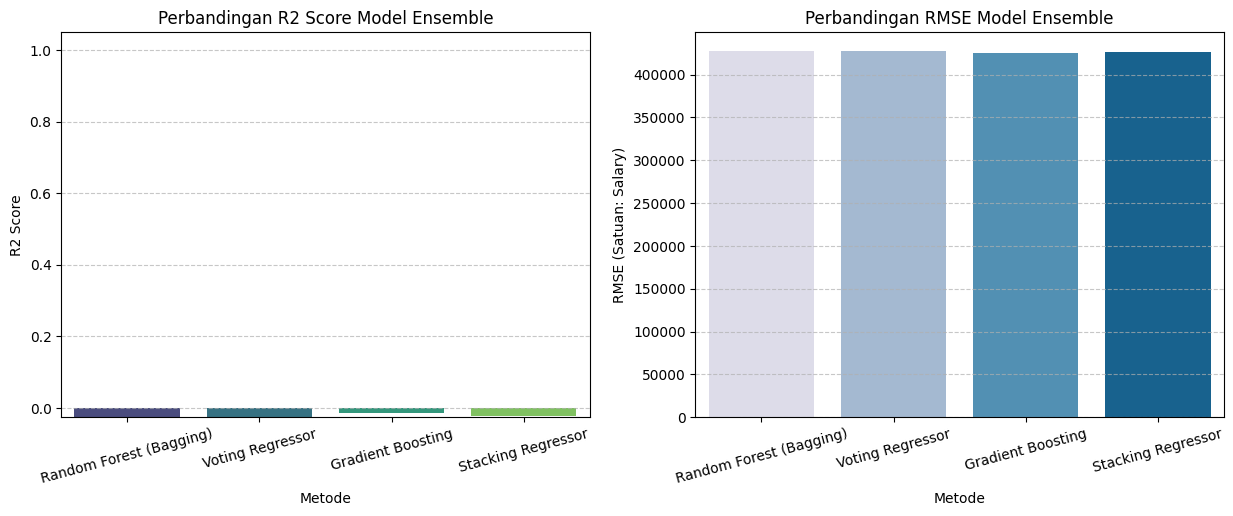

In [ ]:
## Visualisasi Perbandingan
plt.figure(figsize=(15, 5))

# Visualisasi Perbandingan Berdasarkan R2 Score
plt.subplot(1, 2, 1)
sns.barplot(x='Metode', y='R2 Score', data=results, palette='viridis')
plt.title('Perbandingan R2 Score Model Ensemble', fontsize=12)
plt.ylabel('R2 Score')
plt.ylim(results['R2 Score'].min() * 0.95, 1.05) # Batas Y disesuaikan
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Visualisasi Perbandingan Berdasarkan RMSE
plt.subplot(1, 2, 2)
sns.barplot(x='Metode', y='RMSE', data=results, palette='PuBu')
plt.title('Perbandingan RMSE Model Ensemble', fontsize=12)
plt.ylabel('RMSE (Satuan: Salary)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

Berdasarkan hasil keluaran pada tabel perbandingan, diperoleh bahwa semua metode ensemble learning (Gradient Boosting, Stacking, Voting, dan Random Forest) menunjukkan kinerja yang tidak signifikan dalam memprediksi 'Salary', yang dibuktikan dengan semua $R^2$ Score bernilai negatif dan RMSE yang sangat tinggi. Namun apabila dibandingkan, secara umum dapat dilihat bahwa  Gradient Boosting menunjukkan kinerja terbaik dengan $R^2$ Score paling paling tinggi yaitu $-0.0152$ dan RMSE terendah $425.496,91$.

### Feature Importance

In [ ]:
# Melihat fitur apa yang paling berpengaruh dalam memprediksi
importances = rf_model.feature_importances_
feature_names = X_train_final.columns

# Buat DataFrame
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head() # Menampilkan Top 5 Fitur

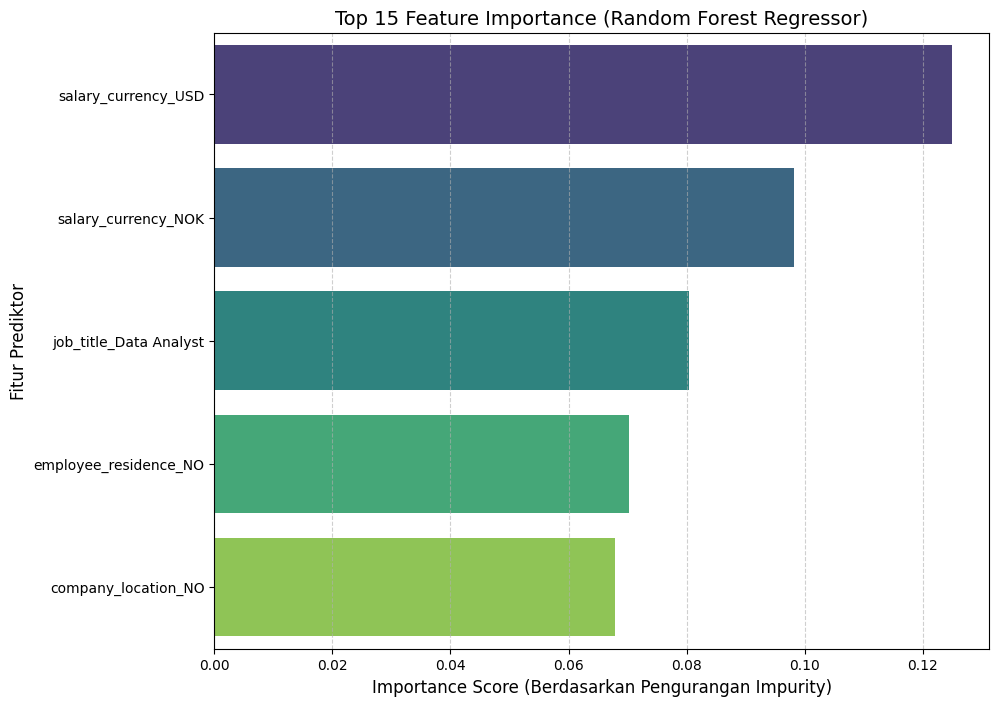

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Top 15 Feature Importance (Random Forest Regressor)', fontsize=14)
plt.xlabel('Importance Score (Berdasarkan Pengurangan Impurity)', fontsize=12)
plt.ylabel('Fitur Prediktor', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Berdasarkan hasil analisi Feature Importance dapat dilihat bahwa fitur salary_currency_USD merupakan faktor yang paling signifikan dan dominan dalam memprediksi 'Salary', ditunjukkan oleh skornya yang paling tinggi. Kemudian diikuti oleh fitur salary_currency_NOK, job_title_Data_Analyst, employee_residence_NO, dan company_location_NO.

# Kesimpulan

Berdasarkan implementasi dan evaluasi berbagai metode Ensemble Learning pada dataset Salary yang terdiri dari 9 fitur diperoleh kesimpulan bahwa keempat metode Ensemble Learning (Random Forest, Voting, Boosting, dan Stacking) untuk memodelkan regresi pada variabel target 'Salary' menunjukkan kinerja yang kurang signifikan pada semua model. Hal ini terbukti dari semua $R^2$ Score yang bernilai negatif, mengindikasikan bahwa tidak ada satu pun model ensemble yang mampu memprediksi 'Salary' dengan baik. Meskipun demikian, secara keseluruhan, Gradient Boosting menunjukkan kinerja terbaik dengan $R^2$ Score paling tinggi yaitu $-0.0152$ dan RMSE paling rendah yaitu $425.496,91$.

Kegagalan ini kemungkinan diindikasikan oleh karakteristik data target yang miring (heavily right-skewed) dan adanya outlier ekstrem, seperti yang terlihat pada hasil visualisasi data eksploratif. Analisis Feature Importance lebih lanjut menegaskan bahwa variabel salary_currency, company_location, dan job_title adalah fitur yang paling berpengaruh.

# Referensi

Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: Data mining, inference, and prediction (2nd ed.). Springer.

Sagi, O., & Rokach, L. (2018). Ensemble learning: A survey. Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery, 8(4), e1249. https://doi.org/10.1002/widm.1249

Santoso, B. (2021). Penerapan machine learning dalam pengambilan keputusan berbasis data. Jurnal Informatika, 10(2), 115-125.